# Part I - (Fordbike System Data)
## by (Arnold Nambubbi)

## Introduction
> The dataset has information about bike rides in a bike sharing set up that covers the greater San Francisco Bay area. The dataset has 183,412 entries and 16 columns. The features included in the dataset are as follows:

duration_sec
start_time
end_time
start_station_id
start_station_name
start_station_latitude
start_station_longitude
end_station_id
end_station_name
end_station_latitude
end_station_longitude
bike_id
user_type
member_birth_year
member_gender
bike_share_for_all_trip




## Preliminary Wrangling


In [88]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline

#### Loading Dataset


In [89]:
# Making a list of all the zip files
zipped = glob.glob('./data/*.zip')

In [90]:
# Extract all zipfile using zipfile library
for zip_file in zipped:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall("./data/")

In [91]:
file_list = glob.glob('./data/*.csv') 


In [92]:
ford_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_bike.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
163385,882,2019-02-05 09:14:03.4360,2019-02-05 09:28:45.5560,124.0,19th St at Florida St,37.760447,-122.410807,81.0,Berry St at 4th St,37.775880,-122.393170,3258,Subscriber,1993.0,Female,No
4530,517,2019-02-28 15:39:47.5380,2019-02-28 15:48:24.8960,211.0,Broadway at 40th St,37.827757,-122.256716,181.0,Grand Ave at Webster St,37.811377,-122.265192,5414,Subscriber,1987.0,Male,No
69835,342,2019-02-19 18:56:45.7270,2019-02-19 19:02:27.8330,49.0,S Park St at 3rd St,37.780760,-122.394989,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5268,Subscriber,1992.0,Male,No
170450,146,2019-02-04 08:17:47.0540,2019-02-04 08:20:13.8330,232.0,MLK Jr Way at 14th St,37.806163,-122.276040,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,4559,Subscriber,1988.0,Male,No
112139,494,2019-02-12 16:06:13.1650,2019-02-12 16:14:27.4100,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,50.0,2nd St at Townsend St,37.780526,-122.390288,5557,Subscriber,1991.0,Female,No


In [93]:
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [94]:
ford_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [95]:
#Checking total null values
ford_bike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### Member birth year and Gender have significant missing values

In [96]:
#Checking the unique values in the dataset
ford_bike.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [97]:
#Checking number of duplicated entries
ford_bike.duplicated().sum()

0

In [98]:
#Checking data types for start_time
type(ford_bike['start_time'][0])



str

In [99]:
#Checking data types for end_time
type(ford_bike['end_time'][0])

str

In [100]:
#Checking data types for user_type
type(ford_bike['user_type'][0])

str

In [101]:
#Checking data types for bike_share_for_all_trip
type(ford_bike['bike_share_for_all_trip'][0])

str

## Quality Issues
1.) start_time and end_time are strings
2.) start_station_id and end_station_id are floats
3.) bike_id is an integer
4.) user_type is a string
5.) member_gender is a string
6.) Date and time are combined to one column

## Tidiness Issues
Month and day of the start_time are not clear

## Cleaning Data

In [102]:
#make a copy of the ford_bike dataset
ford_bike_clean = ford_bike.copy()

In [103]:
ford_bike_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
173321,655,2019-02-03 12:03:01.6400,2019-02-03 12:13:57.3160,276.0,Julian St at The Alameda,37.332233,-121.912516,311.0,Paseo De San Antonio at 2nd St,37.333798,-121.886943,4044,Subscriber,1993.0,Male,Yes
33705,479,2019-02-24 10:52:43.0640,2019-02-24 11:00:42.6770,114.0,Rhode Island St at 17th St,37.764478,-122.402570,355.0,23rd St at Tennessee St,37.755367,-122.388795,5228,Customer,1993.0,Male,No
91320,1643,2019-02-16 08:56:42.4270,2019-02-16 09:24:06.3170,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,562,Customer,1997.0,Female,No
10806,770,2019-02-27 19:32:39.1080,2019-02-27 19:45:29.1110,89.0,Division St at Potrero Ave,37.769218,-122.407646,108.0,16th St Mission BART,37.764710,-122.419957,6077,Subscriber,1994.0,Male,No
182930,811,2019-02-01 07:26:22.5300,2019-02-01 07:39:54.2880,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3237,Subscriber,1985.0,Male,No


#### Define: Changing the data type for start_time, end_time,start_station_id,end_station_id,bike_id,user_type,member_gender

#### Code

In [104]:
ford_bike_clean.start_time = pd.to_datetime(ford_bike_clean.start_time, yearfirst=True)
ford_bike_clean.end_time = pd.to_datetime(ford_bike_clean.end_time, yearfirst=True)
ford_bike_clean.start_station_id = ford_bike_clean.start_station_id.astype(str)
ford_bike_clean.end_station_id = ford_bike_clean.end_station_id.astype(str)
ford_bike_clean.bike_id = ford_bike_clean.bike_id.astype(str)
ford_bike_clean.member_gender = ford_bike_clean.member_gender.astype('category')
ford_bike_clean.user_type = ford_bike_clean.user_type.astype('category')



#### Test

In [105]:
ford_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

#### Define 
Separating month and day from the start_time column for better analysis

#### Code

In [106]:

ford_bike_clean['day_of_the_week'] = ford_bike_clean['start_time'].dt.day_name()
ford_bike_clean['hour'] = ford_bike_clean['start_time'].dt.hour



#### Test

In [107]:
ford_bike_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_the_week,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23


## What is the structure of the dataset:
The dataset has 183412 rows and 16 columns.  Some columns have missing data like: start_station_id, start_station_name , end_station_id, end_station_name, member_birth_year, member_gender 


## What is/are the main features of interest in your dataset:
duration_sec, start_time
## What features in the dataset do you think will help support your investigation into your features of interest?
user_type will assist in categorizing the analysis in terms of subscribers and customers , start_station_name  and end_station_name will assist in knowing the location. member_gender has missing values but can assist to some level in categorizing in terms of gender, bike_share_for_all_trip,

## Univariate Exploration


In [108]:
#Defining a function to label x-y axis and title
def label(x, y, t):
    """
    x(str): x-axis title
    y(str): y-axis title
    t(str): main title
    Returns:
    None
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

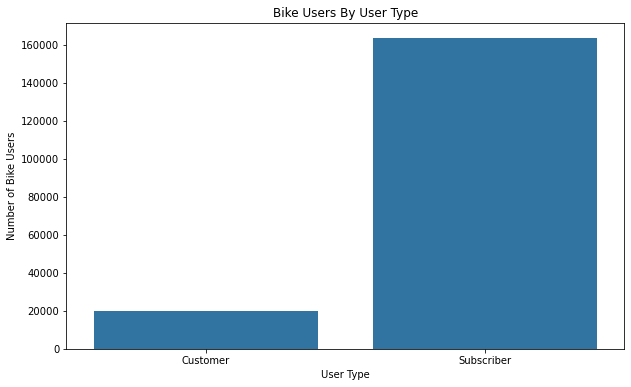

In [109]:
#Plotting a bar chart to visualize the bike users based on user_type (Customers,Subscribers)
plt.figure(figsize=(10,6))     
base_color = sns.color_palette()[0]
ax = sns.countplot(data=ford_bike_clean, x ='user_type', color=base_color)
cat_counts = ford_bike_clean['user_type'].value_counts()
plt.title('Bike Users By User Type')
n_points = ford_bike_clean.shape[0]
label("User Type","Number of Bike Users","Bike Users By User Type")

#### Majority of the bike users are Subscribers

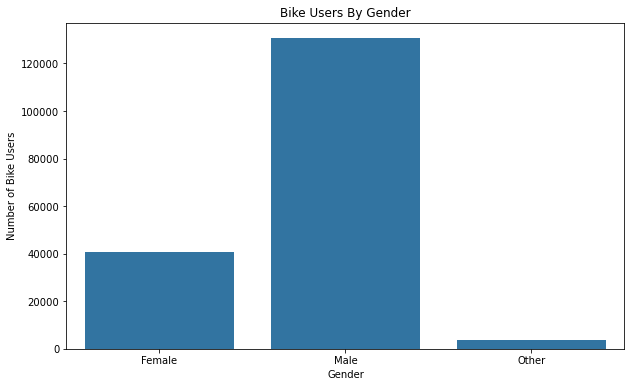

In [110]:
#Plotting a bar chart to visualize the bike users based on gender
plt.figure(figsize=(10,6))     
base_color = sns.color_palette()[0]
ax = sns.countplot(data=ford_bike_clean, x ='member_gender', color=base_color)
cat_counts = ford_bike_clean['member_gender'].value_counts()
plt.title('Bike Users By Gender')
n_points = ford_bike_clean.shape[0]
label("Gender","Number of Bike Users","Bike Users By Gender")

Text(0.5, 1.0, 'Bike User Type by Percentage')

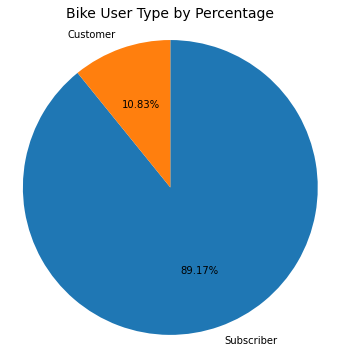

In [111]:
#Plotting a pie chart to show bike user_type by percentage
plt.figure(figsize=(10,6))
sorted_counts = ford_bike_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Type by Percentage',fontsize = 14)

#### Subsribers seem to be the majority of the bike users-89%

Text(0.5, 1.0, 'Bike Gender by Percentage')

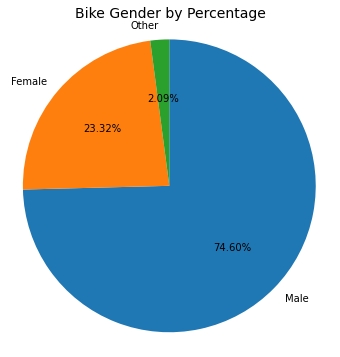

In [112]:
#Plotting a pie chart to show bike member_gender by percentage
plt.figure(figsize=(10,6))
sorted_counts = ford_bike_clean['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike Gender by Percentage',fontsize = 14)

#### Seems like the males are the main customers-75%

''

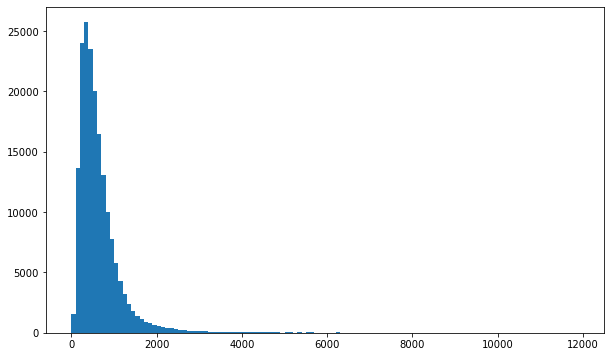

In [113]:
#Checking the distribution of duration
plt.figure(figsize=(10,6))
bins = np.arange(0, 12000, 100)

plt.hist(data = ford_bike_clean, x ='duration_sec', bins=bins)
;

#### duration_sec data is skewed to the right

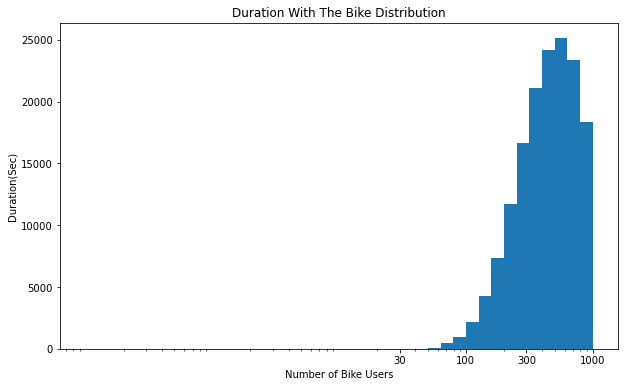

In [114]:
#Checking the distribution of duration after log transformation
plt.figure(figsize=(10,6))
ticks = [30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
bins = 10**np.arange(-1, 3+0.1, 0.1)
plt.hist(data = ford_bike_clean, x ='duration_sec', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
label("Number of Bike Users","Duration(Sec)","Duration With The Bike Distribution");

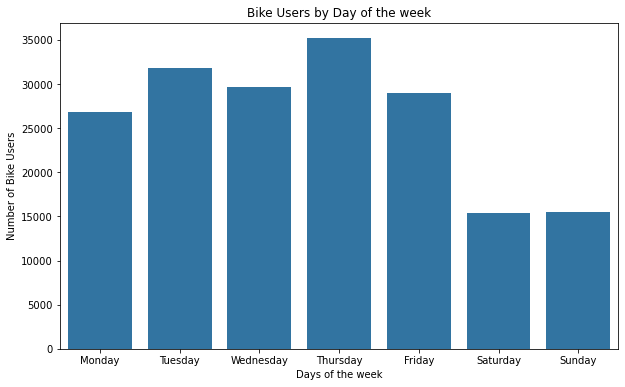

In [115]:
#Plotting a bar chart to visualize the bike users based on day_of_the_week
day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10,6))     
base_color = sns.color_palette()[0]
ax = sns.countplot(data=ford_bike_clean, x ='day_of_the_week', color=base_color, order=day)
cat_counts = ford_bike_clean['day_of_the_week'].value_counts()
n_points = ford_bike_clean.shape[0]
label("Days of the week","Number of Bike Users","Bike Users by Day of the week")

####  Seems the bikes are mostly used during the weekdays than weekends. Tuesdays and Thursdays as the peak days

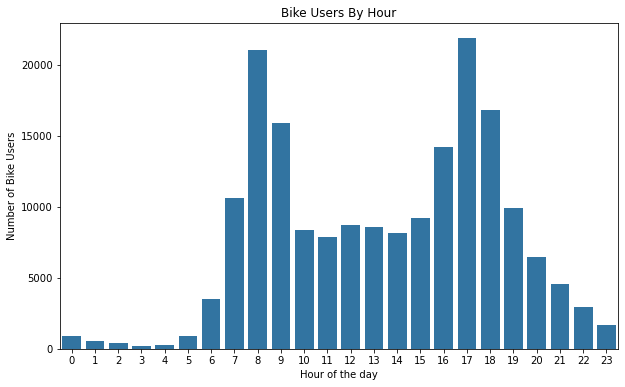

In [116]:
#Plotting a bar chart to visualize the bike users based on the hour of the day
hour = np.arange(0,24)
plt.figure(figsize=(10,6))     
base_color = sns.color_palette()[0]
ax = sns.countplot(data=ford_bike_clean, x ='hour', color=base_color, order=hour)
cat_counts = ford_bike_clean['hour'].value_counts()
n_points = ford_bike_clean.shape[0]
label("Hour of the day","Number of Bike Users",'Bike Users By Hour')

#### Seems the most busy hours are 8am and 5pm. Possible it is when people are going to work and leaving from work to home

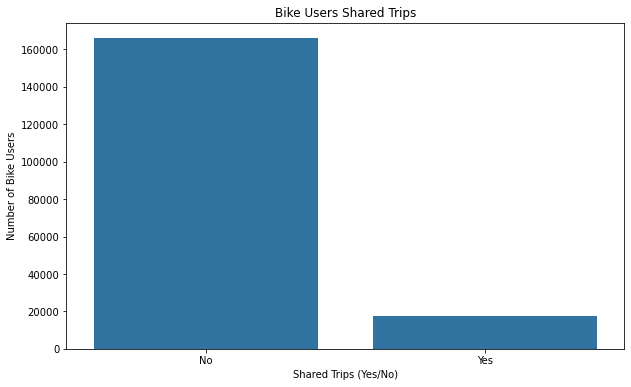

In [117]:
#Plotting a bar chart to visualize the bike users based on bike_share_for_all_trip
plt.figure(figsize=(10,6))     
base_color = sns.color_palette()[0]
ax = sns.countplot(data=ford_bike_clean, x ='bike_share_for_all_trip', color=base_color)
cat_counts = ford_bike_clean['bike_share_for_all_trip'].value_counts()
n_points = ford_bike_clean.shape[0]
label("Shared Trips (Yes/No)","Number of Bike Users",'Bike Users Shared Trips');


#### Majority of the bike users do not share trips

Text(0.5, 1.0, 'Bike Gender by Shared Trips')

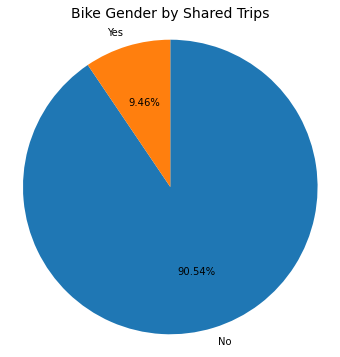

In [118]:
#Plotting a pie chart to show Shared Trips by percentage
plt.figure(figsize=(10,6))
sorted_counts = ford_bike_clean['bike_share_for_all_trip'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike Gender by Shared Trips',fontsize = 14)

#### 91% of the trips were not shared trips

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Subscribers were 89% of the bike users. Males are 75% of the bike users. 91% of the trips were not shared trips. It seems most of the bike users use the bikes for commute. As I have observed the peak hours for bike usage is 8am and 5pm. Also, the bikes are mostly used during the week and there is a decline of users on the weekend. Log transformation was done when plotting the second distribution of bike duration.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I created two columns from the start_time data. One column for the hour and the other for the day of the week. The two columns have helped in identifying trends of bike usage based on hour of the day and the day of the week.  

## Bivariate Exploration


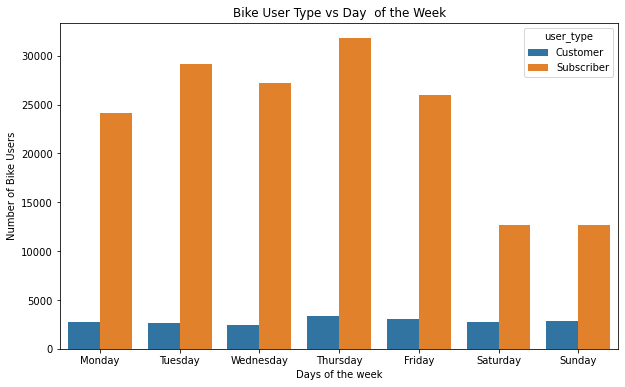

In [119]:
# Plotting barchart to check on the relationship between user_type and day of the week
plt.figure(figsize=(10,6))
day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data = ford_bike_clean, x = 'day_of_the_week', hue = 'user_type',order = day)
label("Days of the week","Number of Bike Users",'Bike User Type vs Day  of the Week');


#### There is a steady decline for bike usage during the weekends for the subscribers. The customers seem to be consistent on bike usage throughout the week

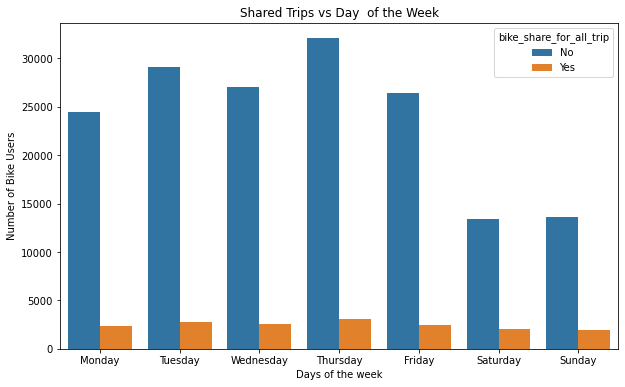

In [120]:
# Plotting barchart to check on the relationship between shared trip vs day of the week
plt.figure(figsize=(10,6))
day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data = ford_bike_clean, x = 'day_of_the_week', hue = 'bike_share_for_all_trip',order = day)
label("Days of the week","Number of Bike Users",'Shared Trips vs Day  of the Week')

#### There is a noticeable decline for non-shared trips during the weekends. Shared trips seem to be consistent on bike usage throughout the week

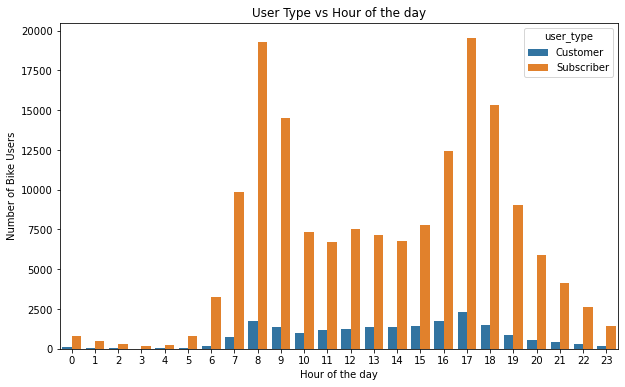

In [121]:
# Plotting barchart to check on the relationship between user type and hour of the day
plt.figure(figsize=(10,6))
hour = np.arange(0,24)
sns.countplot(data = ford_bike_clean, x = 'hour', hue = 'user_type')
label("Hour of the day","Number of Bike Users",'User Type vs Hour of the day')

#### Both the customers and subscribers have similar patterns when it comes to time. The peak times are 8am and 5pm

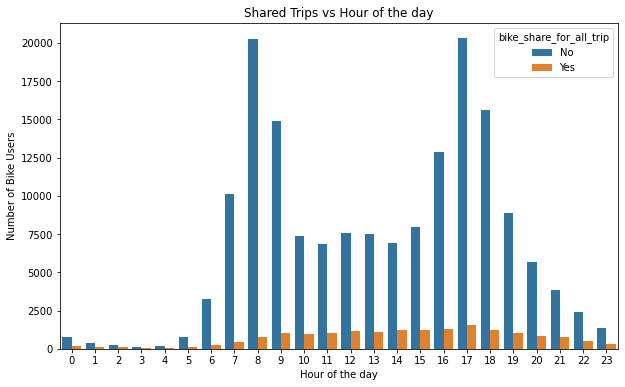

In [122]:
# Plotting barchart to check on the relationship between user type and hour of the day
plt.figure(figsize=(10,6))
hour = np.arange(0,24)
sns.countplot(data = ford_bike_clean, x = 'hour', hue = 'bike_share_for_all_trip')
label("Hour of the day","Number of Bike Users",'Shared Trips vs Hour of the day')

#### The peak for non shared trips is 8am and 5pm. Makes sense since they are the peak hours

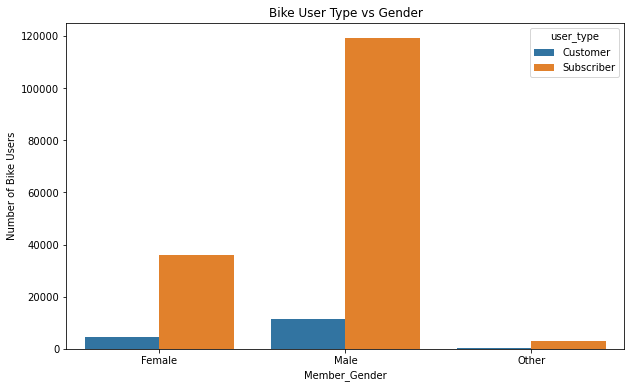

In [123]:
# Plotting barchart to check on the relationship between user type and gender
plt.figure(figsize=(10,6))
sns.countplot(data = ford_bike_clean, x = 'member_gender', hue = 'user_type')
label("Member_Gender","Number of Bike Users",'Bike User Type vs Gender')

#### There are more male bike users than females and there are more subscribers than customers. The same is translated on the above plot

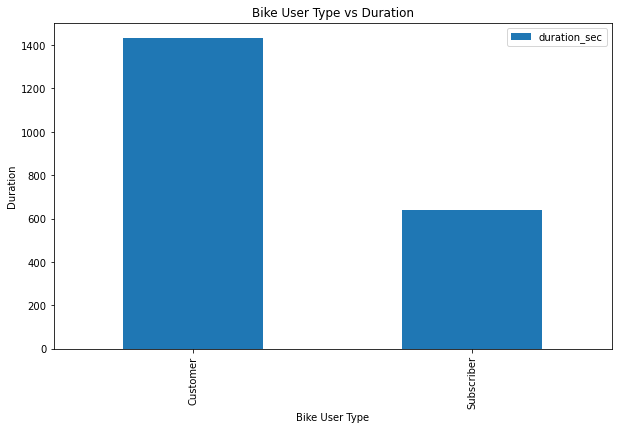

In [124]:
#Plotting a bargraph of the average time subscribers and customers spend time on the bikes
ford_bike_usertype_duration = ford_bike_clean[['user_type','duration_sec']].groupby('user_type').mean()
ford_bike_usertype_duration.plot(kind = 'bar',figsize=(10,6),color = base_color)
label("Bike User Type","Duration",'Bike User Type vs Duration')


#### On average customers seem to spend more time on the bikes than subscribers

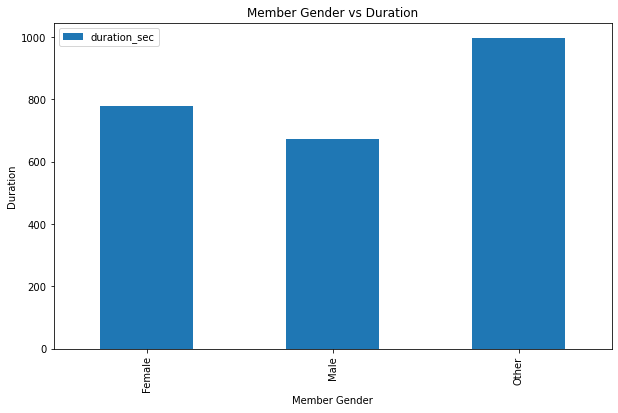

In [125]:
#Plotting a bargraph of the average time male,females and others spend time on the bikes
ford_bike_usertype_duration = ford_bike_clean[['member_gender','duration_sec']].groupby('member_gender').mean()
ford_bike_usertype_duration.plot(kind = 'bar',figsize=(10,6),color = base_color)
label("Member Gender","Duration",'Member Gender vs Duration')

#### On average, Other and Females tend to spend more time on the bikes than males

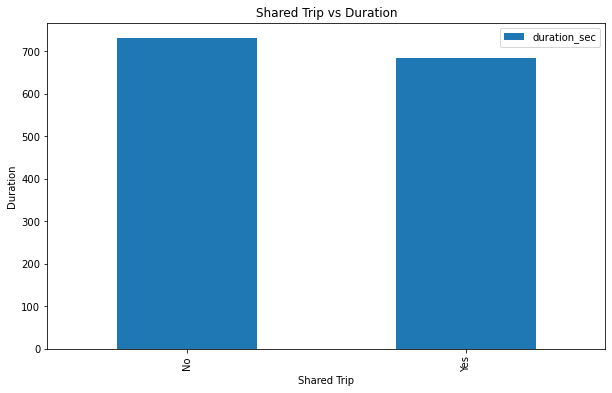

In [126]:
#Plotting a bargraph of the average time shared trips spend time on the bikes
ford_bike_usertype_duration = ford_bike_clean[['bike_share_for_all_trip','duration_sec']].groupby('bike_share_for_all_trip').mean()
ford_bike_usertype_duration.plot(kind = 'bar',figsize=(10,6),color = base_color)
label("Shared Trip","Duration",'Shared Trip vs Duration')

#### Shared trips and non shared trips seem to have close average duration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Both the customers and subscribers have similar patterns when it comes to time. The peak times are 8am and 5pm
Subscribers have reduced bike usage over the weekend and the customers seem consistent throughout the week.
There is a noticeable decline for non-shared trips during the weekends. Shared trips seem to be consistent on bike usage throughout the week
The peak time for non-shared trips is 8am and 5pm. Makes sense since they are the peak hours
Customers seem to spend more time on the bikes than subscribers


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

On average, other and females tend to spend more time on the bikes than males yet the males are 75% of the bike users
On average customers seem to spend more time on the bikes than subscribers yet subscribers are 89% of the bike users

## Multivariate Exploration

Text(0.5, 1.0, 'Duration Usage by the Hour(User_Type)')

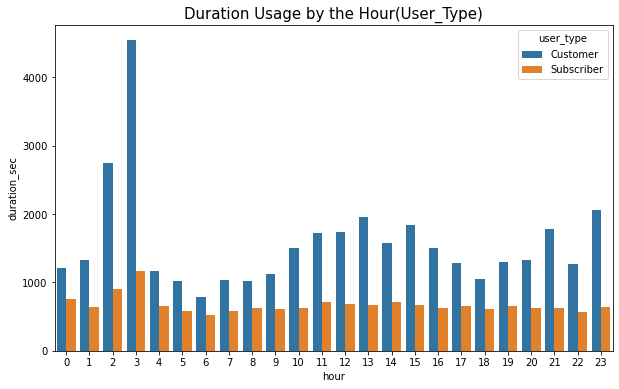

In [127]:
# plotting a barplot to show the relationship between duration, user type and hour of the day
plt.figure(figsize=(10,6))
hour = np.arange(0,24)
sns.barplot(data = ford_bike_clean, x = 'hour',y= 'duration_sec',hue = 'user_type',ci=None)
plt.title('Duration Usage by the Hour(User_Type)', fontsize=15)

#### Customers tend to be spending most time with the bikes at each time of the day with the peak times being 2am and 3am

Text(0.5, 1.0, 'Duration Usage by the Hour(Gender)')

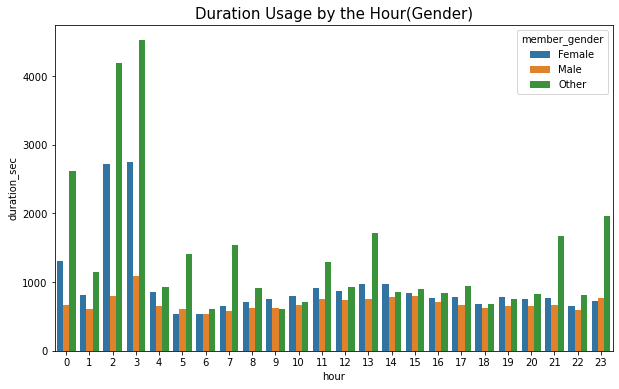

In [128]:
# plotting a barplot to show the relationship between duration, gender and hour of the day
plt.figure(figsize=(10,6))
hour = np.arange(0,24)
sns.barplot(data = ford_bike_clean, x = 'hour',y= 'duration_sec',hue = 'member_gender',ci=None)
plt.title('Duration Usage by the Hour(Gender)', fontsize=15)

#### Females and Other tend to be spending most time with the bikes at each time of the day with the peak times being 2am and 3am

Text(0.5, 1.0, 'Duration Usage by the Hour(Shared Trip)')

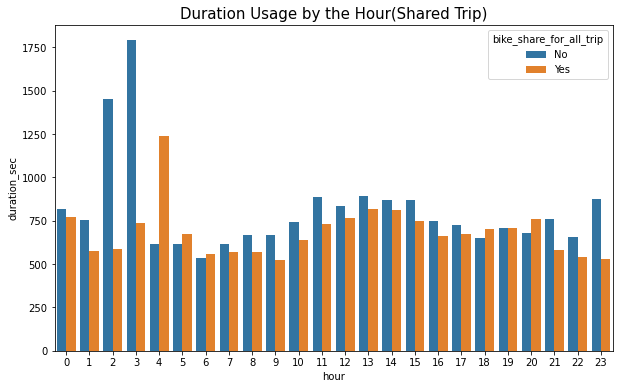

In [129]:
# plotting a barplot to show the relationship between duration, shared trip and hour of the day
plt.figure(figsize=(10,6))
hour = np.arange(0,24)
sns.barplot(data = ford_bike_clean, x = 'hour',y= 'duration_sec',hue = 'bike_share_for_all_trip',ci=None)
plt.title('Duration Usage by the Hour(Shared Trip)', fontsize=15)

#### The peak for shared trips is 2am and 3am

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Females and Other tend to be spending most time with the bikes at each time of the day with the peak times being 2am and 3am yet they are 25% of the bike users
Customers tend to be spending most time with the bikes at each time of the day with the peak times being 2am and 3am yet they are 11% of the bike users

### Were there any interesting or surprising interactions between features?

The peak time where the bike riders spend most their time with the bikes is between 2am and 3am


## Conclusions


#### 89% of the bike users are subscribers, 75% are males and 91% of the trips were non-shared trips. Weekdays are the peak days for bike usage and there is a decline during the weekends. The most busy hours for bike usage are 8am and 5am. On average, customers seem to spend more time with the bikes than subscribers and the peak times are 2am and 3am. Other and females spend more time on average with the bikes than males and their peak times are 2am and 3am. The overall peak time where the bike users spend most of the time with the bikes is also 2am and 3pm.